In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets
df=pd.DataFrame(X)
df['class']=y
# metadata
# print(iris.metadata)
# variable information
# print(iris.variables)

## Exploring Data

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
Iris=df.to_csv('Iris.csv')

In [10]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df['petal width'].min()

0.1

## Data Visualization

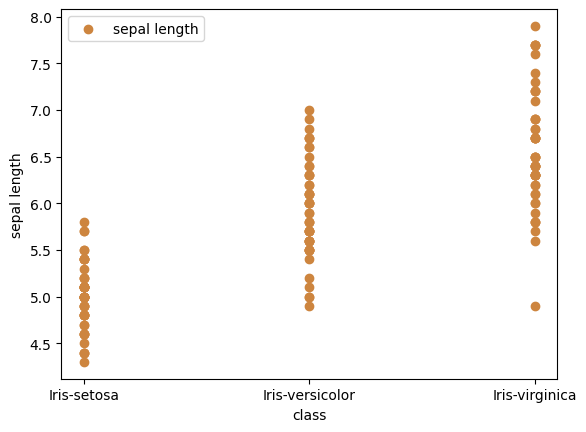

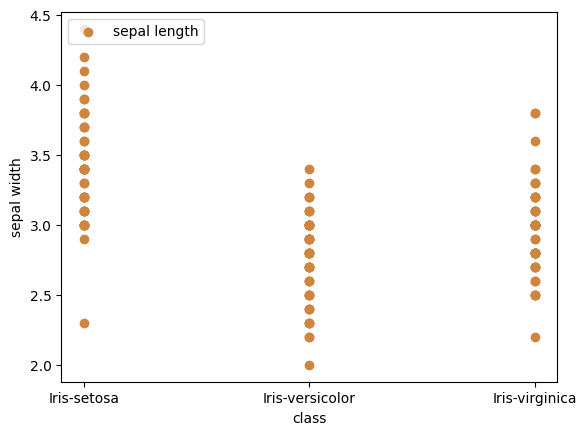

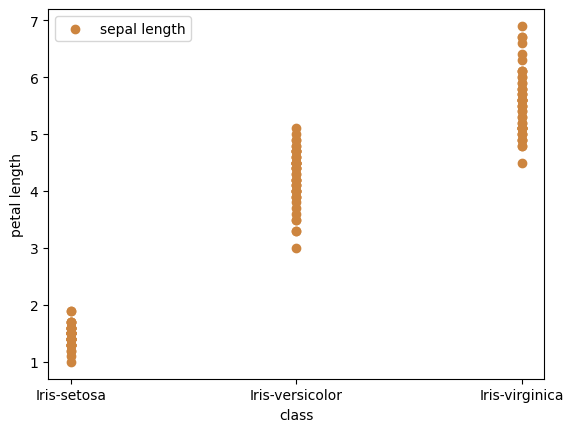

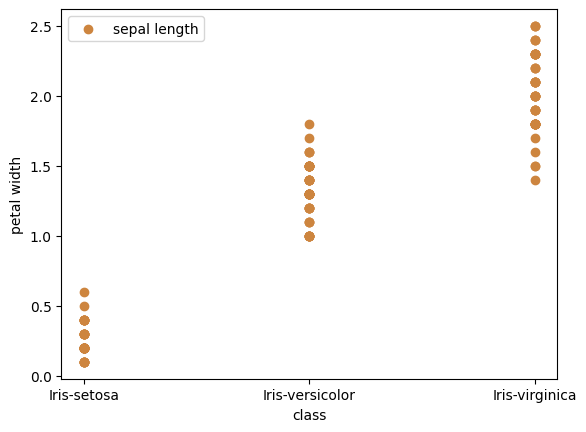

In [11]:
col_names=df.columns[:-1]
for i in col_names:
    plt.scatter(df['class'],df[i],color='peru')
    plt.ylabel(i)
    plt.xlabel('class')
    plt.legend(col_names,loc='upper left')
    plt.show()

In [12]:
col_names

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

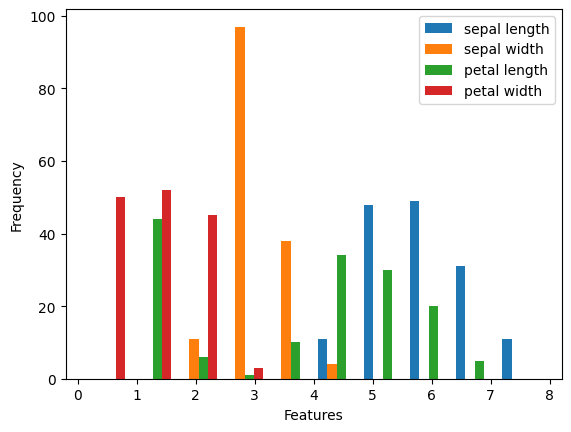

In [13]:
plt.hist(X)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.legend(col_names)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

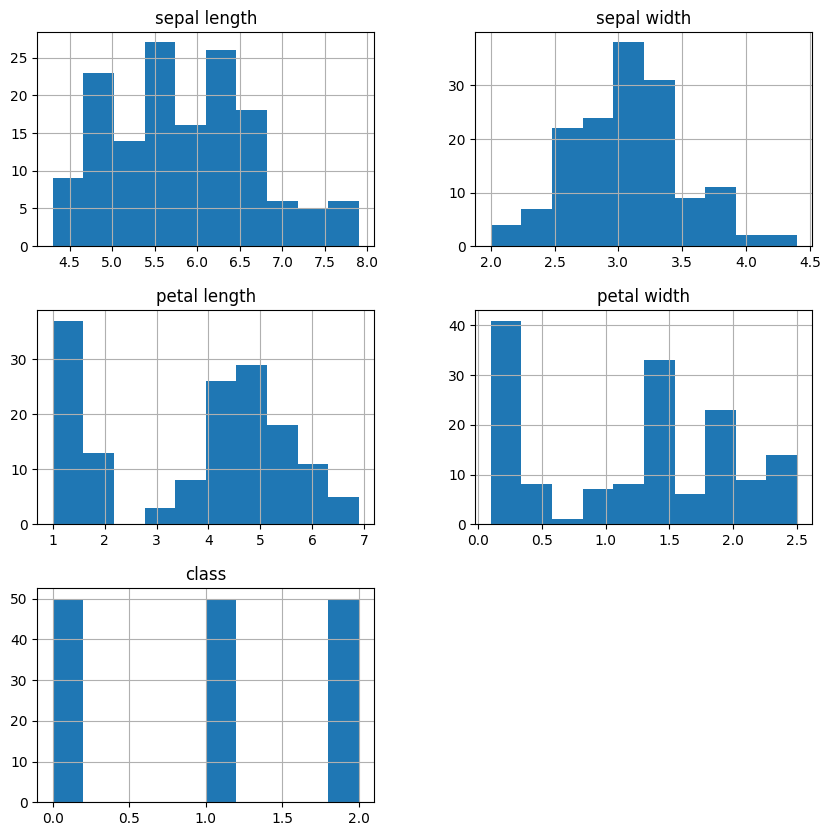

In [28]:
p=df.hist(figsize=(10,10))

## Model Training

In [65]:
from sklearn.model_selection import train_test_split

In [101]:
X=df.drop('class',axis=1)
y=df['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# x_train=X[:105]
# y_train=y[:105]
# x_test=X[105:]
# y_test=y[105:]

In [102]:
# We have to predict values from 3 values, so we will use classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [103]:
knn=KNeighborsClassifier(weights='uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
y_pred_knn=knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

1.0